In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('processed_data.csv', index_col=0)
df.head()

,Age (>35),Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,Country,PrevSalary,Skills,Num_of_skills,Employed
0,0,0,Master,1,1,0,1,7,Sweden,51552,C++;Python;Git;PostgreSQL,4,0
1,0,0,Undergraduate,1,1,0,1,12,Spain,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,0,0,Master,1,1,0,1,15,Germany,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,0,0,Undergraduate,1,1,0,1,9,Canada,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,1,0,PhD,0,1,0,0,40,Singapore,160932,C++;Python,2,0


## Checking NaN or missing values

In [2]:
df.isnull().sum()

Age (>35)        0
Accessibility    0
EdLevel          0
Employment       0
Gender           0
MentalHealth     0
MainBranch       0
YearsCode        0
Country          0
PrevSalary       0
Skills           0
Num_of_skills    0
Employed         0
dtype: int64

In [3]:
y = df['Employed']
X = df.drop(columns=['EdLevel', 'Country', 'Skills', 'Employed'], axis=1)

## Normalize the data

In [4]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

feature_names = X.columns  # save this BEFORE scaling (when X_train is still DF)
#X_scaled = scaler.fit_transform(X)
#X_scaled

## Split the data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Train the model

In [6]:
from sklearn.linear_model import LogisticRegression

# create the lr model
lr_model = LogisticRegression()

# train the model on the training data
lr_model.fit(X_train, y_train)

# predict the target variable on test data
y_pred = lr_model.predict(X_test)
y_pred

c:\Users\allah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 1, 0, 0])

## Evaluation of the model

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7693809891457378

## Implementing SHAP for our model

In [8]:
import shap

explainer = shap.KernelExplainer(lr_model.predict, shap.kmeans(X_train, 10))
shap_values = explainer.shap_values(X_test)

  0%|          | 0/22019 [00:00<?, ?it/s]

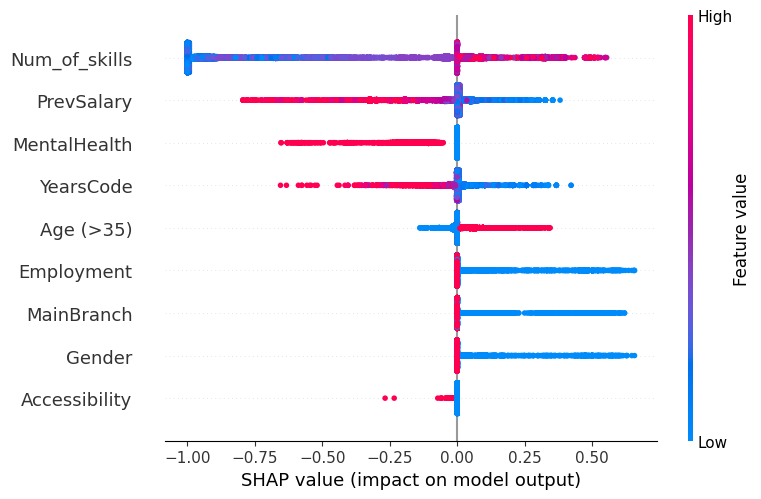

In [9]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [10]:
explainer = shap.LinearExplainer(lr_model, X_train)
shap_values = explainer.shap_values(X_test)

exp = shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test[0],
    feature_names=feature_names
)

shap.plots.waterfall(exp)

KeyError: 0

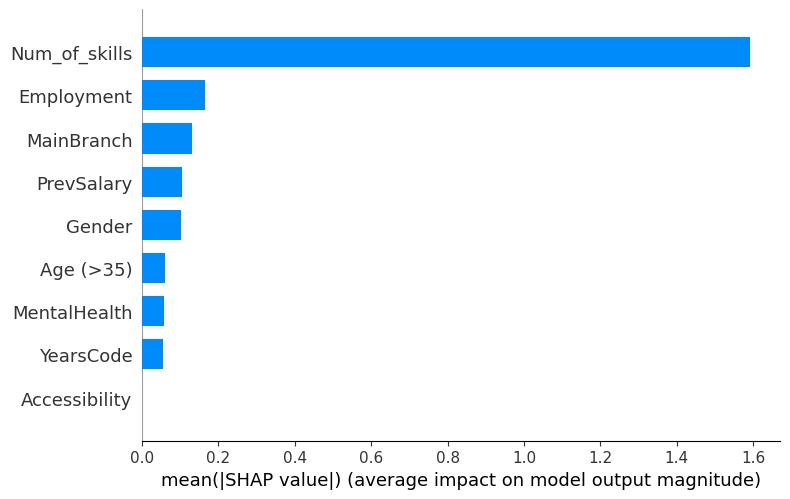

In [11]:
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=feature_names)